In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [3]:
# Importing  dataset

lead=pd.read_csv("/Users/gaganullas/Downloads/Xeducationleads_data.csv")
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# Shape of the Data Set
lead.shape

(9240, 37)

In [5]:
# Info About the Data Set
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Check for null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Counting the Number of null values present in the Dataset
round(lead.isnull().sum()/len(lead.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Standard code to Drop null values based on certain Percentage which you decicde.

In [8]:
#Dropping columns with more than 40% Null values
cols=lead.columns
for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 40):
        lead.drop(i, 1, inplace = True)

In [9]:
# Checking the shape after dropping the Null Values
lead.shape

(9240, 32)

#### From the above command we get to know if we have any duplicate value in the Data Set.

In [10]:
# Check if there are any duplicate values in the dataset
lead[lead.duplicated(keep=False)]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 32 columns]

In [11]:
# Dropping un-necessary columns

drop_list=['Get updates on DM Content','Update me on Supply Chain Content', 'Search', 'Magazine', 'Do Not Call',
          'I agree to pay the amount through cheque', 'Receive More Updates About Our Courses','Digital Advertisement', 
          'Newspaper', 'X Education Forums', 'Newspaper Article', 'Through Recommendations',
             'What matters most to you in choosing a course', 'Country']

for i in drop_list:
    lead.drop(i, 1, inplace = True)   

In [12]:
# Dropping Prospect ID since they have all unique values
lead.drop(['Prospect ID'], axis=1, inplace = True)

In [13]:
# Checking the Shape again
lead.shape

(9240, 17)

In [14]:
# Info of the Dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          7802 non-null   object 
 10  How did you hear about X Education      7033 non-null   obje

In [15]:
#Check for null values
lead.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Tags                                      3353
Lead Profile                              2709
City                                      1420
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [16]:
# Converting 'Select' values to NaN.
# Generic command on the entire Data Set to replace Select with "NaN"
lead = lead.replace('Select', np.nan)

In [17]:
# Values in City
round(lead.City.value_counts(normalize=True)*100,2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

In [18]:
# Now due to the above command the Null values got replaced with the NaN values from Select
lead.City

0                      NaN
1                      NaN
2                   Mumbai
3                   Mumbai
4                   Mumbai
               ...        
9235                Mumbai
9236                Mumbai
9237                Mumbai
9238    Other Metro Cities
9239          Other Cities
Name: City, Length: 9240, dtype: object

In [19]:
#Imputing Null with Unknown, as it is generally Unknown sources

lead['City'] = lead['City'].replace(np.nan,'Unknown')

In [20]:
# NaN got replaced with Unknown due to above COmmand
lead.City

0                  Unknown
1                  Unknown
2                   Mumbai
3                   Mumbai
4                   Mumbai
               ...        
9235                Mumbai
9236                Mumbai
9237                Mumbai
9238    Other Metro Cities
9239          Other Cities
Name: City, Length: 9240, dtype: object

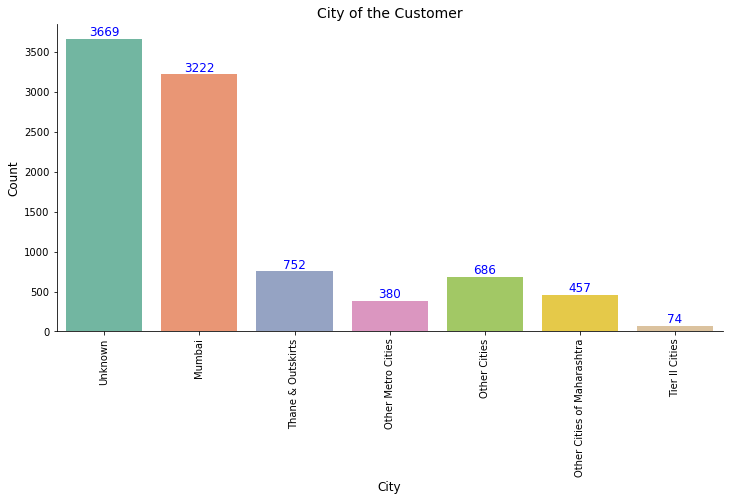

In [21]:
# Graph on City
plot=sns.catplot(x='City',kind='count',data=lead,palette="Set2",aspect=2)
plt.title('City of the Customer',fontsize=14)
plt.xlabel("City",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)


# Code to print count on the Graph
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

#### Last Activity

In [22]:
# Last Activity
round(lead['Last Activity'].value_counts(normalize=True)*100,2)

Email Opened                    37.62
SMS Sent                        30.04
Olark Chat Conversation         10.65
Page Visited on Website          7.00
Converted to Lead                4.68
Email Bounced                    3.57
Email Link Clicked               2.92
Form Submitted on Website        1.27
Unreachable                      1.02
Unsubscribed                     0.67
Had a Phone Conversation         0.33
Approached upfront               0.10
View in browser link Clicked     0.07
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [23]:
#Check for null values
lead['Last Activity'].isnull().sum()

103

In [24]:
# Imputing these Null Values with "Email Opened"
# Using the Fillna Method
lead['Last Activity'].fillna("Email Opened", inplace=True)

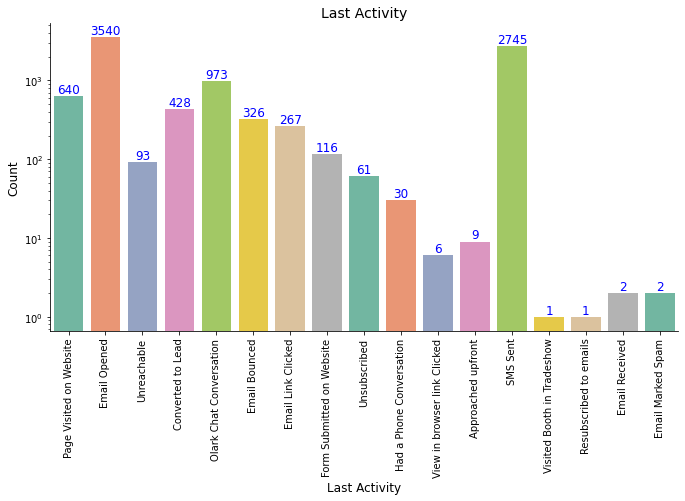

In [25]:
# Graph on City
plot=sns.catplot(x='Last Activity',kind='count',data=lead,palette="Set2",aspect=2)
plt.title('Last Activity',fontsize=14)
plt.xlabel("Last Activity",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log')

# Code to print count on the Graph
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

#### Lead Source

In [26]:
round(lead['Lead Source'].value_counts(normalize=True)*100,2)

Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Press_Release         0.02
Live Chat             0.02
Social Media          0.02
testone               0.01
WeLearn               0.01
welearnblog_Home      0.01
NC_EDM                0.01
blog                  0.01
youtubechannel        0.01
Pay per Click Ads     0.01
Name: Lead Source, dtype: float64

In [27]:
# Merging Two Google sources into one
lead['Lead Source']=lead["Lead Source"].replace('google','Google')

In [28]:
# Merging Sources which have Less Data In them and refering them as Others.
lead['Lead Source']=lead['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','Social Media','testone','welearnblog_Home','WeLearn','NC_EDM','blog','Pay per Click Ads','youtubechannel'],'Other Sources')

In [29]:
# Imputing nullvalues for Lead Source column with Google
lead['Lead Source'].fillna("Google", inplace=True)

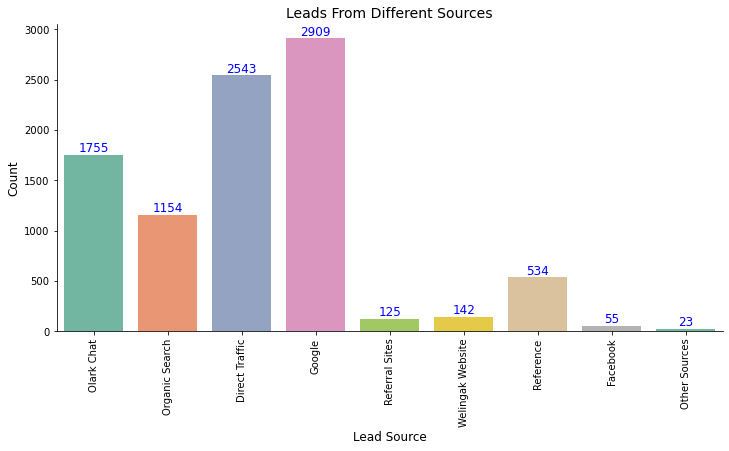

In [30]:
# Graph
plot=sns.catplot(x='Lead Source',kind='count',data=lead,palette="Set2",aspect=2)
plt.title('Leads From Different Sources',fontsize=14)
plt.xlabel("Lead Source",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)

# Code to print count on the Graph
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

#### Total Visits

In [31]:
# Number of Null Values
lead['TotalVisits'].isnull().sum()

137

In [32]:
# The total number of visits made by the customer on the website.
lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [33]:
# Imputing null values with Median for numeric column "Total Visits"
# Using the Fillna method
lead['TotalVisits'].fillna(lead['TotalVisits'].median(),inplace=True)

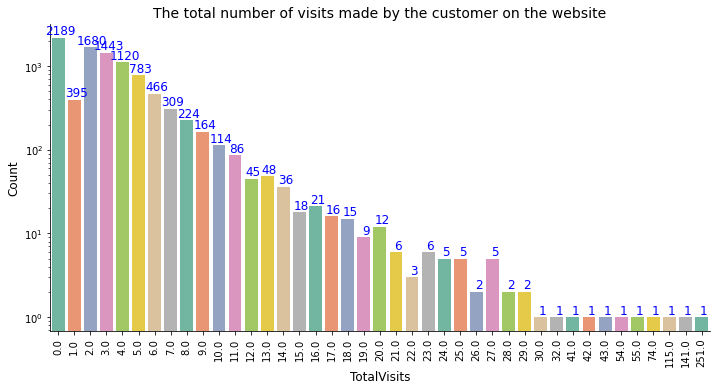

In [34]:
# Graph
plot=sns.catplot(x='TotalVisits',kind='count',data=lead,palette="Set2",aspect=2)
plt.title('The total number of visits made by the customer on the website',fontsize=14)
plt.xlabel("TotalVisits",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log')

# Code to print count on the Graph
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/(1.5), p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

#### Page Views Per Visit

In [35]:
# Average number of pages on the website viewed during the visits.
lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [36]:
# Imputing null values with Median for numeric column "Page Views Per Visit"
# Using the Fillna method
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)

#### Tags

In [37]:
round(lead['Tags'].value_counts(normalize=True)*100,2)

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

In [38]:
# Imputing Null values for Tags column with Not Sure
# Another thing which I can do over here is to impute it with the highest occuring values in the Data set we can decide any approach over here.
# Using the "Fillna" method
lead['Tags'].fillna("Not sure", inplace=True)

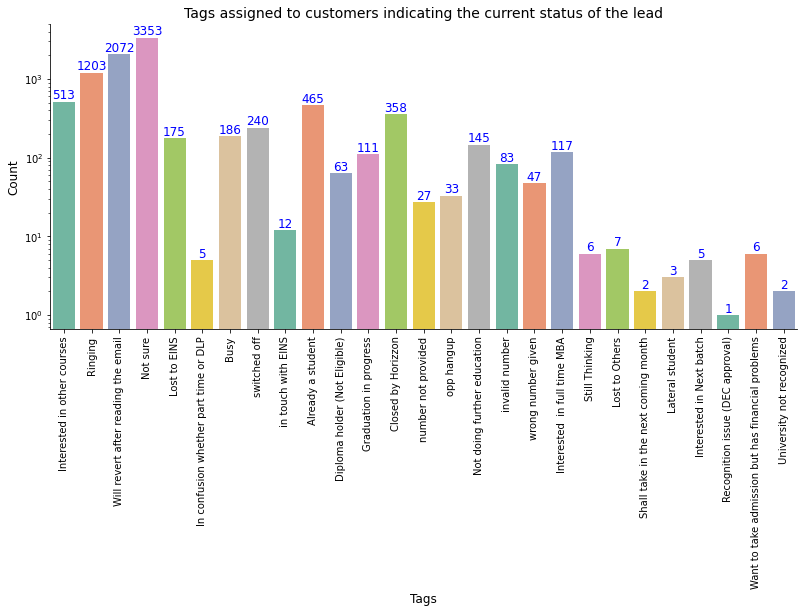

In [39]:
# Tags
plot=sns.catplot(x='Tags',kind='count',data=lead,palette="Set2",aspect=2.5)
plt.title('Tags assigned to customers indicating the current status of the lead',fontsize=14)
plt.xlabel("Tags",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log')

# Code to print count on the Graph
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

#### Specialization

In [40]:
round(lead['Specialization'].value_counts(normalize=True)*100,2)

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Media and Advertising                 3.46
Travel and Tourism                    3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

In [41]:
# Imputing Null Values with Others, as it is generally Unknown 
# Replacing Null Values with Others
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

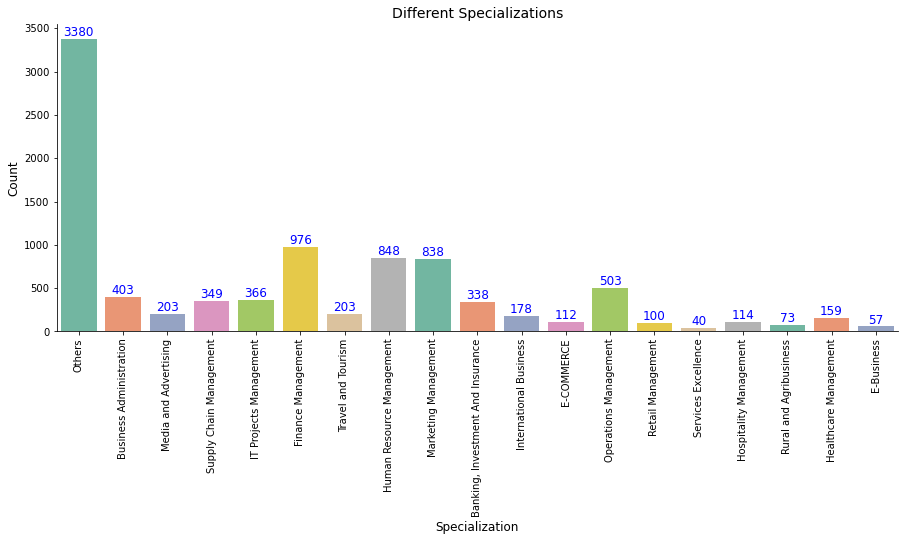

In [42]:
# Graph
plot=sns.catplot(x='Specialization',kind='count',data=lead,palette="Set2",aspect=2.5)
plt.title('Different Specializations',fontsize=14)
plt.xlabel("Specialization",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)

# Code to print count on the Graph
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

#### What is your current occupation

In [43]:
round(lead['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

In [44]:
# Imputing nullvalues for Occupation column with Not known as we are not sure about data
lead['What is your current occupation'].fillna("Not known", inplace=True)

In [45]:
round(lead['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              60.61
Not known               29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

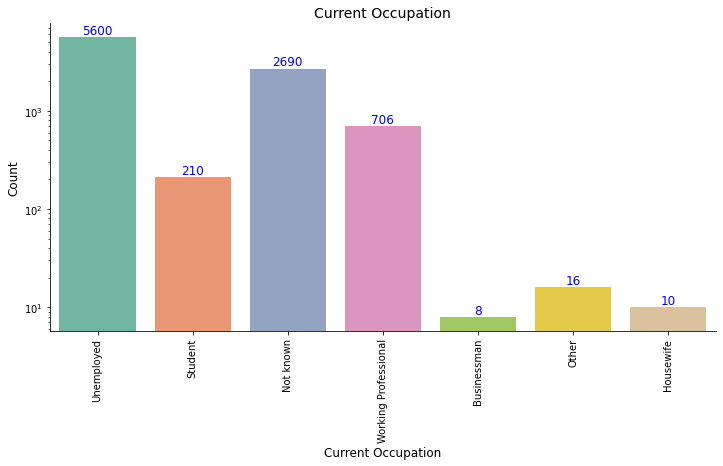

In [46]:
# Graph
plot=sns.catplot(x='What is your current occupation',kind='count',data=lead,palette="Set2",aspect=2)
plt.title('Current Occupation',fontsize=14)
plt.xlabel("Current Occupation",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log')

# Code to print count on the Graph
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

#### How did you hear about X Education

In [47]:
# Values in How did you hear about X Education
lead['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [48]:
round(lead['How did you hear about X Education'].value_counts(normalize=True)*100,2)

Online Search            40.60
Word Of Mouth            17.49
Student of SomeSchool    15.58
Other                     9.35
Multiple Sources          7.64
Advertisements            3.52
Social Media              3.37
Email                     1.31
SMS                       1.16
Name: How did you hear about X Education, dtype: float64

In [49]:
# Imputing nullvalues for How did you hear about X Education column with Other Mediums as we are not sure about data
lead['How did you hear about X Education'].fillna("Not Known", inplace=True)

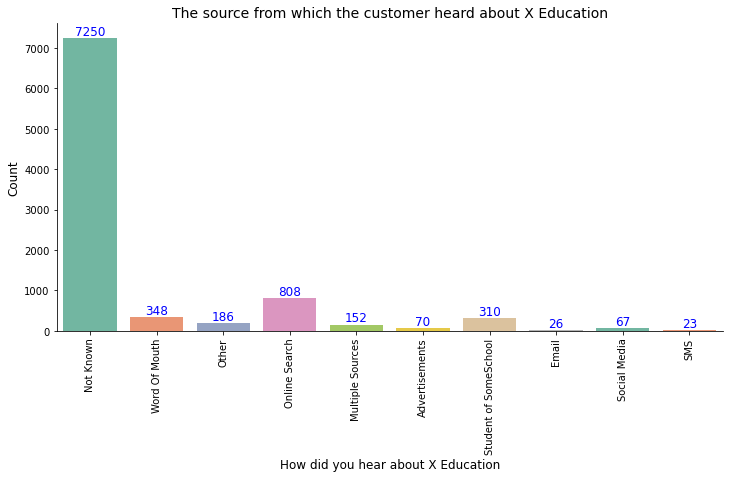

In [50]:
# Graph
plot=sns.catplot(x='How did you hear about X Education',kind='count',data=lead,palette="Set2",aspect=2)
plt.title('The source from which the customer heard about X Education',fontsize=14)
plt.xlabel("How did you hear about X Education",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
#plt.yscale('log')

# Code to print count on the Graph
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

#### Lead Profile

In [51]:
# Values in Lead Profile
lead['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [52]:
round(lead['Lead Profile'].value_counts(normalize=True)*100,2)

Potential Lead                 67.63
Other Leads                    20.42
Student of SomeSchool          10.10
Lateral Student                 1.01
Dual Specialization Student     0.84
Name: Lead Profile, dtype: float64

In [53]:
# Checking the Overall Values in Lead Profile
lead['Lead Profile']

0                  NaN
1                  NaN
2       Potential Lead
3                  NaN
4                  NaN
             ...      
9235    Potential Lead
9236    Potential Lead
9237    Potential Lead
9238               NaN
9239    Potential Lead
Name: Lead Profile, Length: 9240, dtype: object

In [54]:
# Imputing nullvalues for Lead Profile column with Not Known as we are not sure about data
lead['Lead Profile'].fillna("Not Known", inplace=True)

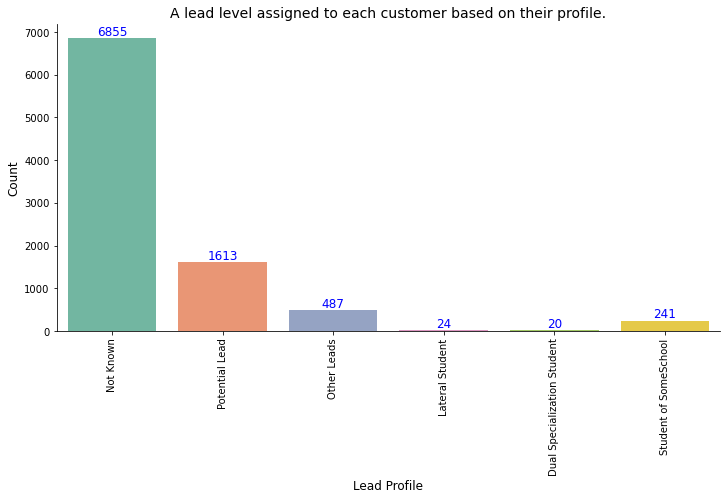

In [55]:
# Graph
plot=sns.catplot(x='Lead Profile',kind='count',data=lead,palette="Set2",aspect=2)
plt.title('A lead level assigned to each customer based on their profile.',fontsize=14)
plt.xlabel("Lead Profile",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=90)
#plt.yscale('log')

# Code to print count on the Graph
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

In [56]:
# Lead Shape after dropping the Null Values
lead.shape

(9240, 17)

In [57]:
# No Null Values present in the Data Set
lead.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
What is your current occupation           0
Tags                                      0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [58]:
# Check for nullvalues row-wise
lead.isnull().sum(axis=1).tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
# Checking for outliers in the continuous variables
num_lead = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [60]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.438636                   487.698268              2.357440
std       4.819024                   548.021466              2.145781
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

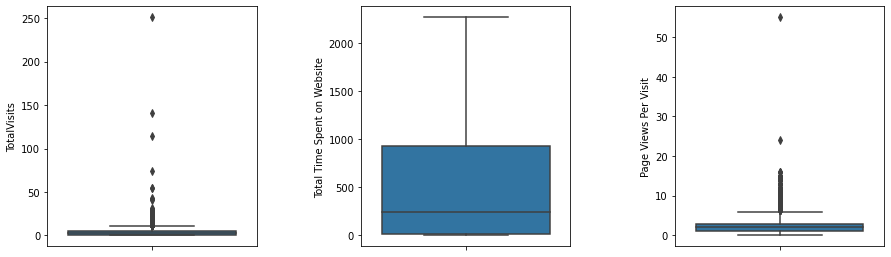

In [61]:
# Checking for outliers in all the numerical columns

plt.figure(figsize=(15,15))

for i in enumerate(num_lead):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(lead[i[1]], orient="v")
    plt.subplots_adjust(wspace=0.5,hspace=0.2)
        
plt.show()

In [62]:
# Outlier Treatment for Total Visits
Q1=lead.TotalVisits.quantile(0.10)
Q3=lead.TotalVisits.quantile(0.90)
IQR=Q3-Q1
lead=lead[(lead.TotalVisits>=Q1-1.5*IQR) & (lead.TotalVisits<=Q3+1.5*IQR)]

In [63]:
# Outlier Treatment for Page Views Per Visits
Q1=lead['Page Views Per Visit'].quantile(0.10)
Q3=lead['Page Views Per Visit'].quantile(0.90)
IQR=Q3-Q1
lead=lead[(lead['Page Views Per Visit']>=Q1-1.5*IQR) & (lead['Page Views Per Visit']<=Q3+1.5*IQR)]

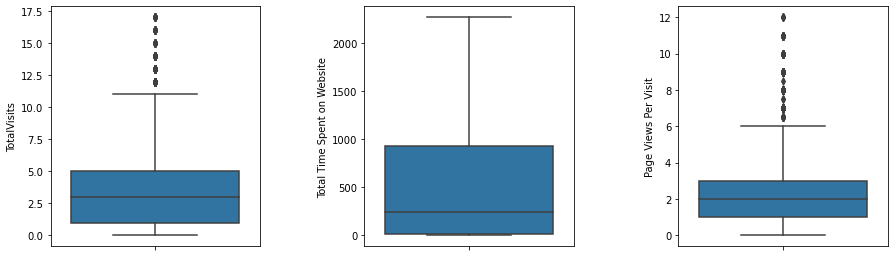

In [64]:
plt.figure(figsize=(15,15))

for i in enumerate(num_lead):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(lead[i[1]], orient="v")
    plt.subplots_adjust(wspace=0.5,hspace=0.2)
        
plt.show()

#### Now, we have dropped most of the outliers from the above Numerical Columns and the remaining ones can be ignored because increasing the range of the quantile further will result in decreasing the data points.

### Data Preparation

#### Preparing the Data for Modelling

In [65]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9136 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9136 non-null   int64  
 1   Lead Origin                             9136 non-null   object 
 2   Lead Source                             9136 non-null   object 
 3   Do Not Email                            9136 non-null   object 
 4   Converted                               9136 non-null   int64  
 5   TotalVisits                             9136 non-null   float64
 6   Total Time Spent on Website             9136 non-null   int64  
 7   Page Views Per Visit                    9136 non-null   float64
 8   Last Activity                           9136 non-null   object 
 9   Specialization                          9136 non-null   object 
 10  How did you hear about X Education      9136 non-null   obje

In [66]:
# Binary Vars to 1 and 0
varlist=['Do Not Email','A free copy of Mastering The Interview'] 

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


lead[varlist] = lead[varlist].apply(binary_map)
lead.head()   

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  How did you hear about X Education What is your current occupation  \
0                          Not Known                      Unemployed   
1                          Not Known                      Unemployed   
2                          Not Known                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

                                  Tags    Lead Profile     City  \
0          Interested in other courses       Not Known  Unknown   
1                              Ringing       Not Known  Unknown   
2  Will revert after reading the email  Potential Lead   Mumbai   
3                              Ringing       Not Known   Mumbai   
4  Will revert after reading the email       Not Known   Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [67]:
## Dummy Variables
lead_origin=pd.get_dummies(lead['Lead Origin'], prefix='Lead Origin',drop_first=True)
lead_source=pd.get_dummies(lead['Lead Source'], prefix= 'Lead Source',drop_first=True)
lead_last_activity=pd.get_dummies(lead['Last Activity'], prefix='Last Activity',drop_first=True)
lead_current_occupation=pd.get_dummies(lead['What is your current occupation'], prefix='current occupation',drop_first=True)
lead_city=pd.get_dummies(lead['City'], prefix='City',drop_first=True)
lead_tags=pd.get_dummies(lead['Tags'],prefix= 'Tags',drop_first=True)
lead_specialization=pd.get_dummies(lead['Specialization'],prefix='Specialization',drop_first=True)
lead_lastnotableactivity=pd.get_dummies(lead['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
lead_leadprofile=pd.get_dummies(lead['Lead Profile'],prefix='Lead Profile',drop_first=True)
lead_XEducation=pd.get_dummies(lead['How did you hear about X Education'],prefix='How did you hear about X Education',drop_first=True)

In [68]:
# Concatenating with the Dataset
lead=pd.concat([lead,lead_origin],axis=1)
lead=pd.concat([lead,lead_source],axis=1)
lead=pd.concat([lead,lead_last_activity],axis=1)
lead=pd.concat([lead,lead_current_occupation],axis=1)
lead=pd.concat([lead,lead_city],axis=1)
lead=pd.concat([lead,lead_tags],axis=1)
lead=pd.concat([lead,lead_specialization],axis=1)
lead=pd.concat([lead,lead_lastnotableactivity],axis=1)
lead=pd.concat([lead,lead_leadprofile],axis=1)
lead=pd.concat([lead,lead_XEducation],axis=1)

In [69]:
# Now we Drop the redundant columns
lead.drop(['Lead Origin'],axis=1,inplace=True)
lead.drop(['Lead Source'],axis=1,inplace=True)
lead.drop(['Last Activity'],axis=1,inplace=True)
lead.drop(['What is your current occupation'],axis=1,inplace=True)
lead.drop(['City'],axis=1,inplace=True)
lead.drop(['Tags'],axis=1,inplace=True)
lead.drop(['Specialization'],axis=1,inplace=True)
lead.drop(['Last Notable Activity'],axis=1,inplace=True)
lead.drop(['Lead Profile'],axis=1,inplace=True)
lead.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [70]:
# Dataset
lead.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737             0          0          0.0   
1       660728             0          0          5.0   
2       660727             0          1          2.0   
3       660719             0          0          1.0   
4       660681             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  Lead Profile_Student of SomeSchool  \
0                        0  ...                                   0   
1                        0  ...                                   0   
2                        0  ...                                   0   
3                        0  ...                                   0   
4                        0  ...                                   0   

   How did you hear about X Education_Email  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   How did you hear about X Education_Multiple Sources  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   How did you hear about X Education_Not Known  \
0                                             1   
1                                             1   
2                                             1   
3                                             0   
4                                             0   

   How did you hear about X Education_Online Search  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   How did you hear about X Education_Other  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   How did you hear about X Education_SMS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   How did you hear about X Education_Social Media  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   How did you hear about X Education_Student of SomeSchool  \
0   

In [71]:
# Columns present in dataframe
for col in lead.columns: 
    print(col) 

Lead Number
Do Not Email
Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
A free copy of Mastering The Interview
Lead Origin_Landing Page Submission
Lead Origin_Lead Add Form
Lead Origin_Lead Import
Lead Origin_Quick Add Form
Lead Source_Facebook
Lead Source_Google
Lead Source_Olark Chat
Lead Source_Organic Search
Lead Source_Other Sources
Lead Source_Reference
Lead Source_Referral Sites
Lead Source_Welingak Website
Last Activity_Converted to Lead
Last Activity_Email Bounced
Last Activity_Email Link Clicked
Last Activity_Email Marked Spam
Last Activity_Email Opened
Last Activity_Email Received
Last Activity_Form Submitted on Website
Last Activity_Had a Phone Conversation
Last Activity_Olark Chat Conversation
Last Activity_Page Visited on Website
Last Activity_Resubscribed to emails
Last Activity_SMS Sent
Last Activity_Unreachable
Last Activity_Unsubscribed
Last Activity_View in browser link Clicked
Last Activity_Visited Booth in Tradeshow
current occupation_Housew

In [72]:
# Removing duplicated columns
lead = lead.loc[:,~lead.columns.duplicated()]

In [73]:
# Shape of dataframe after dropping duplicate columns
lead.shape

(9136, 120)

In [74]:
# Checking the Null Values
lead.isnull().sum()

Lead Number                                                 0
Do Not Email                                                0
Converted                                                   0
TotalVisits                                                 0
Total Time Spent on Website                                 0
                                                           ..
How did you hear about X Education_Other                    0
How did you hear about X Education_SMS                      0
How did you hear about X Education_Social Media             0
How did you hear about X Education_Student of SomeSchool    0
How did you hear about X Education_Word Of Mouth            0
Length: 120, dtype: int64

#### There are no duplicate columns so we still have around 120 columns.

### Splitting into Train and Test Set

In [75]:
# Will be importing 2 more liabraries over here:
import sklearn
from sklearn.model_selection import train_test_split

In [76]:
# Putting feature variables to X
X = lead.drop(['Converted','Lead Number'],axis=1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   ...  Lead Profile_Student of SomeSchool  \
0  ...                                   0   
1  ...                                   0   
2  ...                                   0   
3  ...                                   0   
4  ...                                   0   

   How did you hear about X Education_Email  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   How did you hear about X Education_Multiple Sources  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   How did you hear about X Education_Not Known  \
0                                             1   
1                                             1   
2                                             1   
3                                             0   
4                                             0   

   How did you hear about X Education_Online Search  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   How did you hear about X Education_Other  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   How did you hear about X Education_SMS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   How did you hear about X Education_Social Media  \
0                                                0   
1                                                0   
2                                                0   
3                   

In [77]:
# Putting Response Variable to y
y=lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [79]:
# Rescaling Process 
# Importing another Liabrary on this

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Creating a list of numeric variables
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Fit on Data
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
7896             0    -0.401654                     1.306686   
8701             0    -0.747311                     0.200127   
6665             0     0.289660                     1.561341   
8087             0    -1.092968                    -0.888112   
2466             0     0.289660                    -0.545519   

      Page Views Per Visit  A free copy of Mastering The Interview  \
7896             -0.150729                                       1   
8701             -0.662236                                       1   
6665              0.872286                                       0   
8087             -1.173744                                       0   
2466             -0.150729                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7896                                    1                          0   
8701                                    1                          0   
6665                                    1                          0   
8087                                    0                          1   
2466                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
7896                        0                           0   
8701                        0                           0   
6665                        0                           0   
8087                        0                           0   
2466                        0                           0   

      Lead Source_Facebook  ...  Lead Profile_Student of SomeSchool  \
7896                     0  ...                                   0   
8701                     0  ...                                   0   
6665                     0  ...                                   0   
8087                     0  ...                                   0   
2466                     0  ...                                   0   

      How did you hear about X Education_Email  \
7896                                         0   
8701                                         0   
6665                                         0   
8087                                         0   
2466                                         0   

      How did you hear about X Education_Multiple Sources  \
7896                                                  0     
8701                                                  0     
6665                                                  0     
8087                                                  0     
2466                                                  0     

      How did you hear about X Education_Not Known  \
7896                                             1   
8701                                             1   
6665                                             0   
8087                                             1   
2466                                             1   

      How did you hear about X Education_Online Search  \
7896                                                 0   
8701                                                 0   
6665                                                 0   
8087                                                 0   
2466                                                 0   

      How did you hear about X Education_Other  \
7896                                         0   
8701                                         0   
6665                                         1   
8087                                         0   
2466                                         0   

      How did you hear about X Education_SMS  \
7896                                       0   
8701                                       0   
6665                                       0   
8087                                       0   
2466                                       0   

      How did you hear about X Education_

In [80]:
# Conversion Rate Percentage
converted=round((sum(lead['Converted'])/len(lead['Converted'].index))*100,2)
converted  

38.5

#### We have a conversion rate of 38.5%

### Step-6 Looking at Correlations

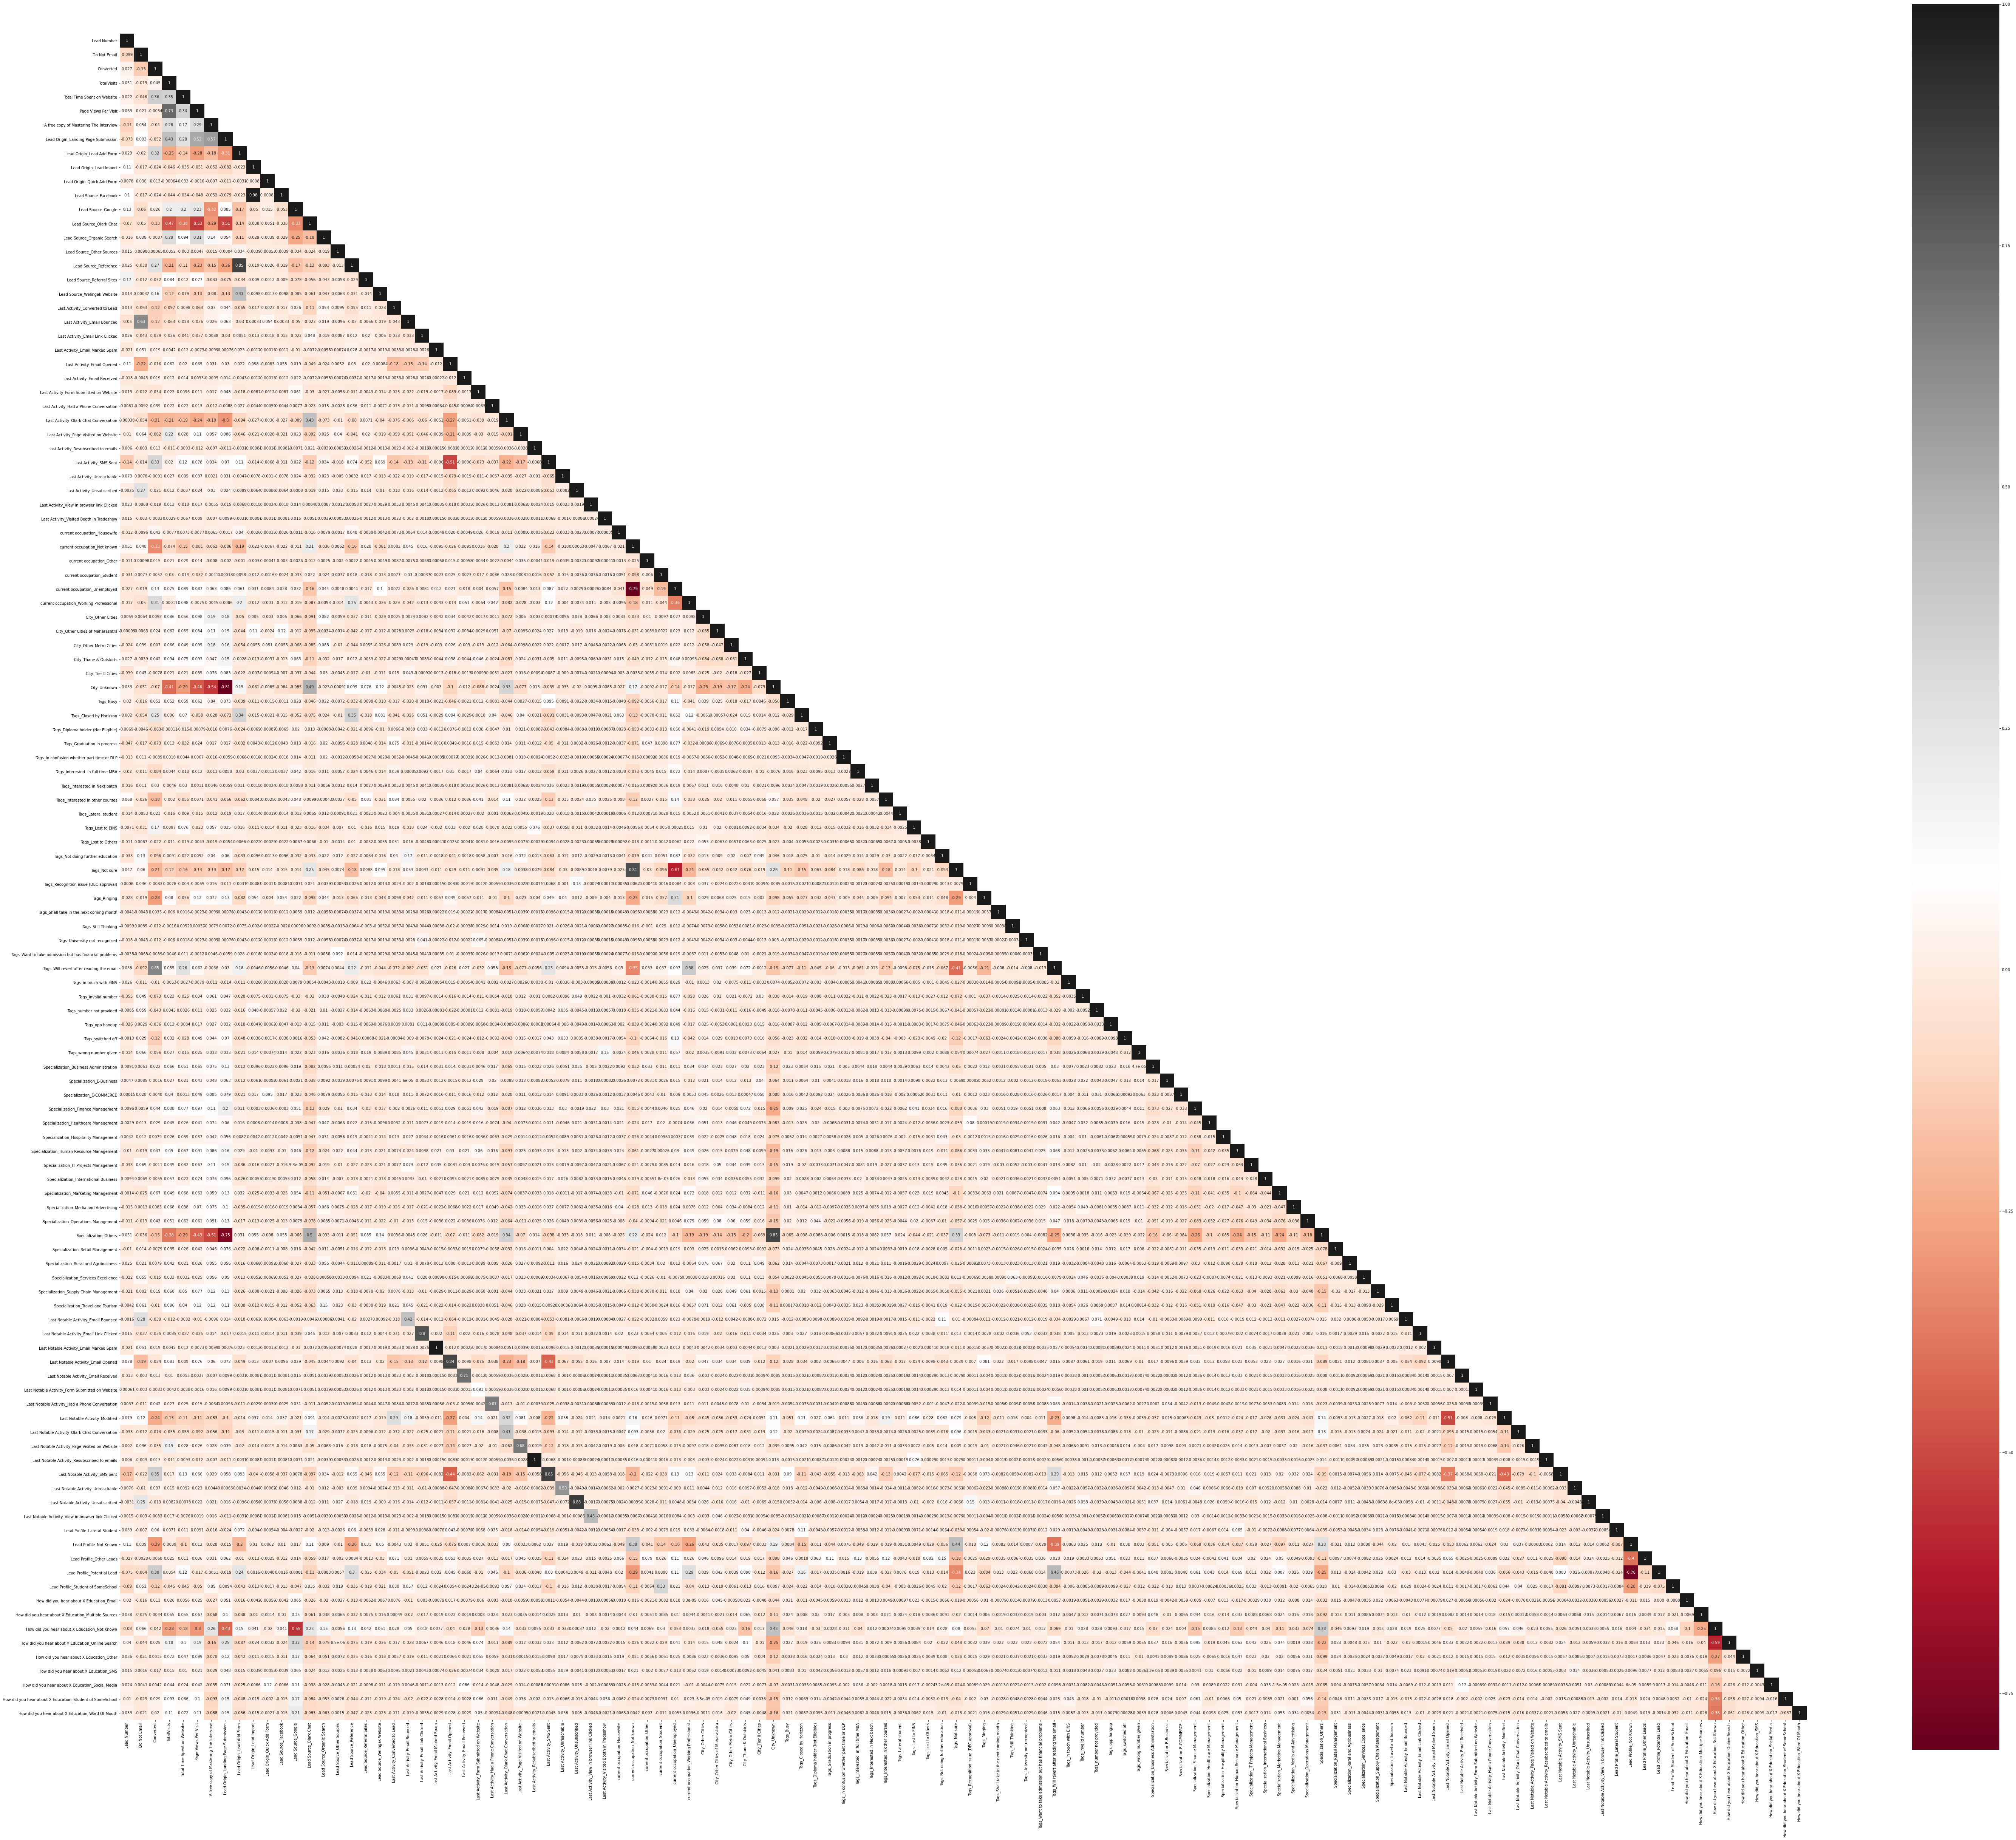

In [81]:
# Heatmap
cor_mat= lead.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(100,85)
sns.heatmap(cor_mat, mask=mask, square=True, annot=True, cbar=True,cmap="RdGy")
plt.show()

In [82]:
# Dropping some highly correlated values from both train and test set

X_test=X_test.drop(['Lead Source_Facebook','Lead Source_Reference','current occupation_Unemployed','City_Unknown','Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Resubscribed to emails','Tags_Not sure'],1)
X_train=X_train.drop(['Lead Source_Facebook','Lead Source_Reference','current occupation_Unemployed','City_Unknown','Last Notable Activity_Email Link Clicked','Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Opened','Last Notable Activity_Resubscribed to emails','Tags_Not sure'],1)


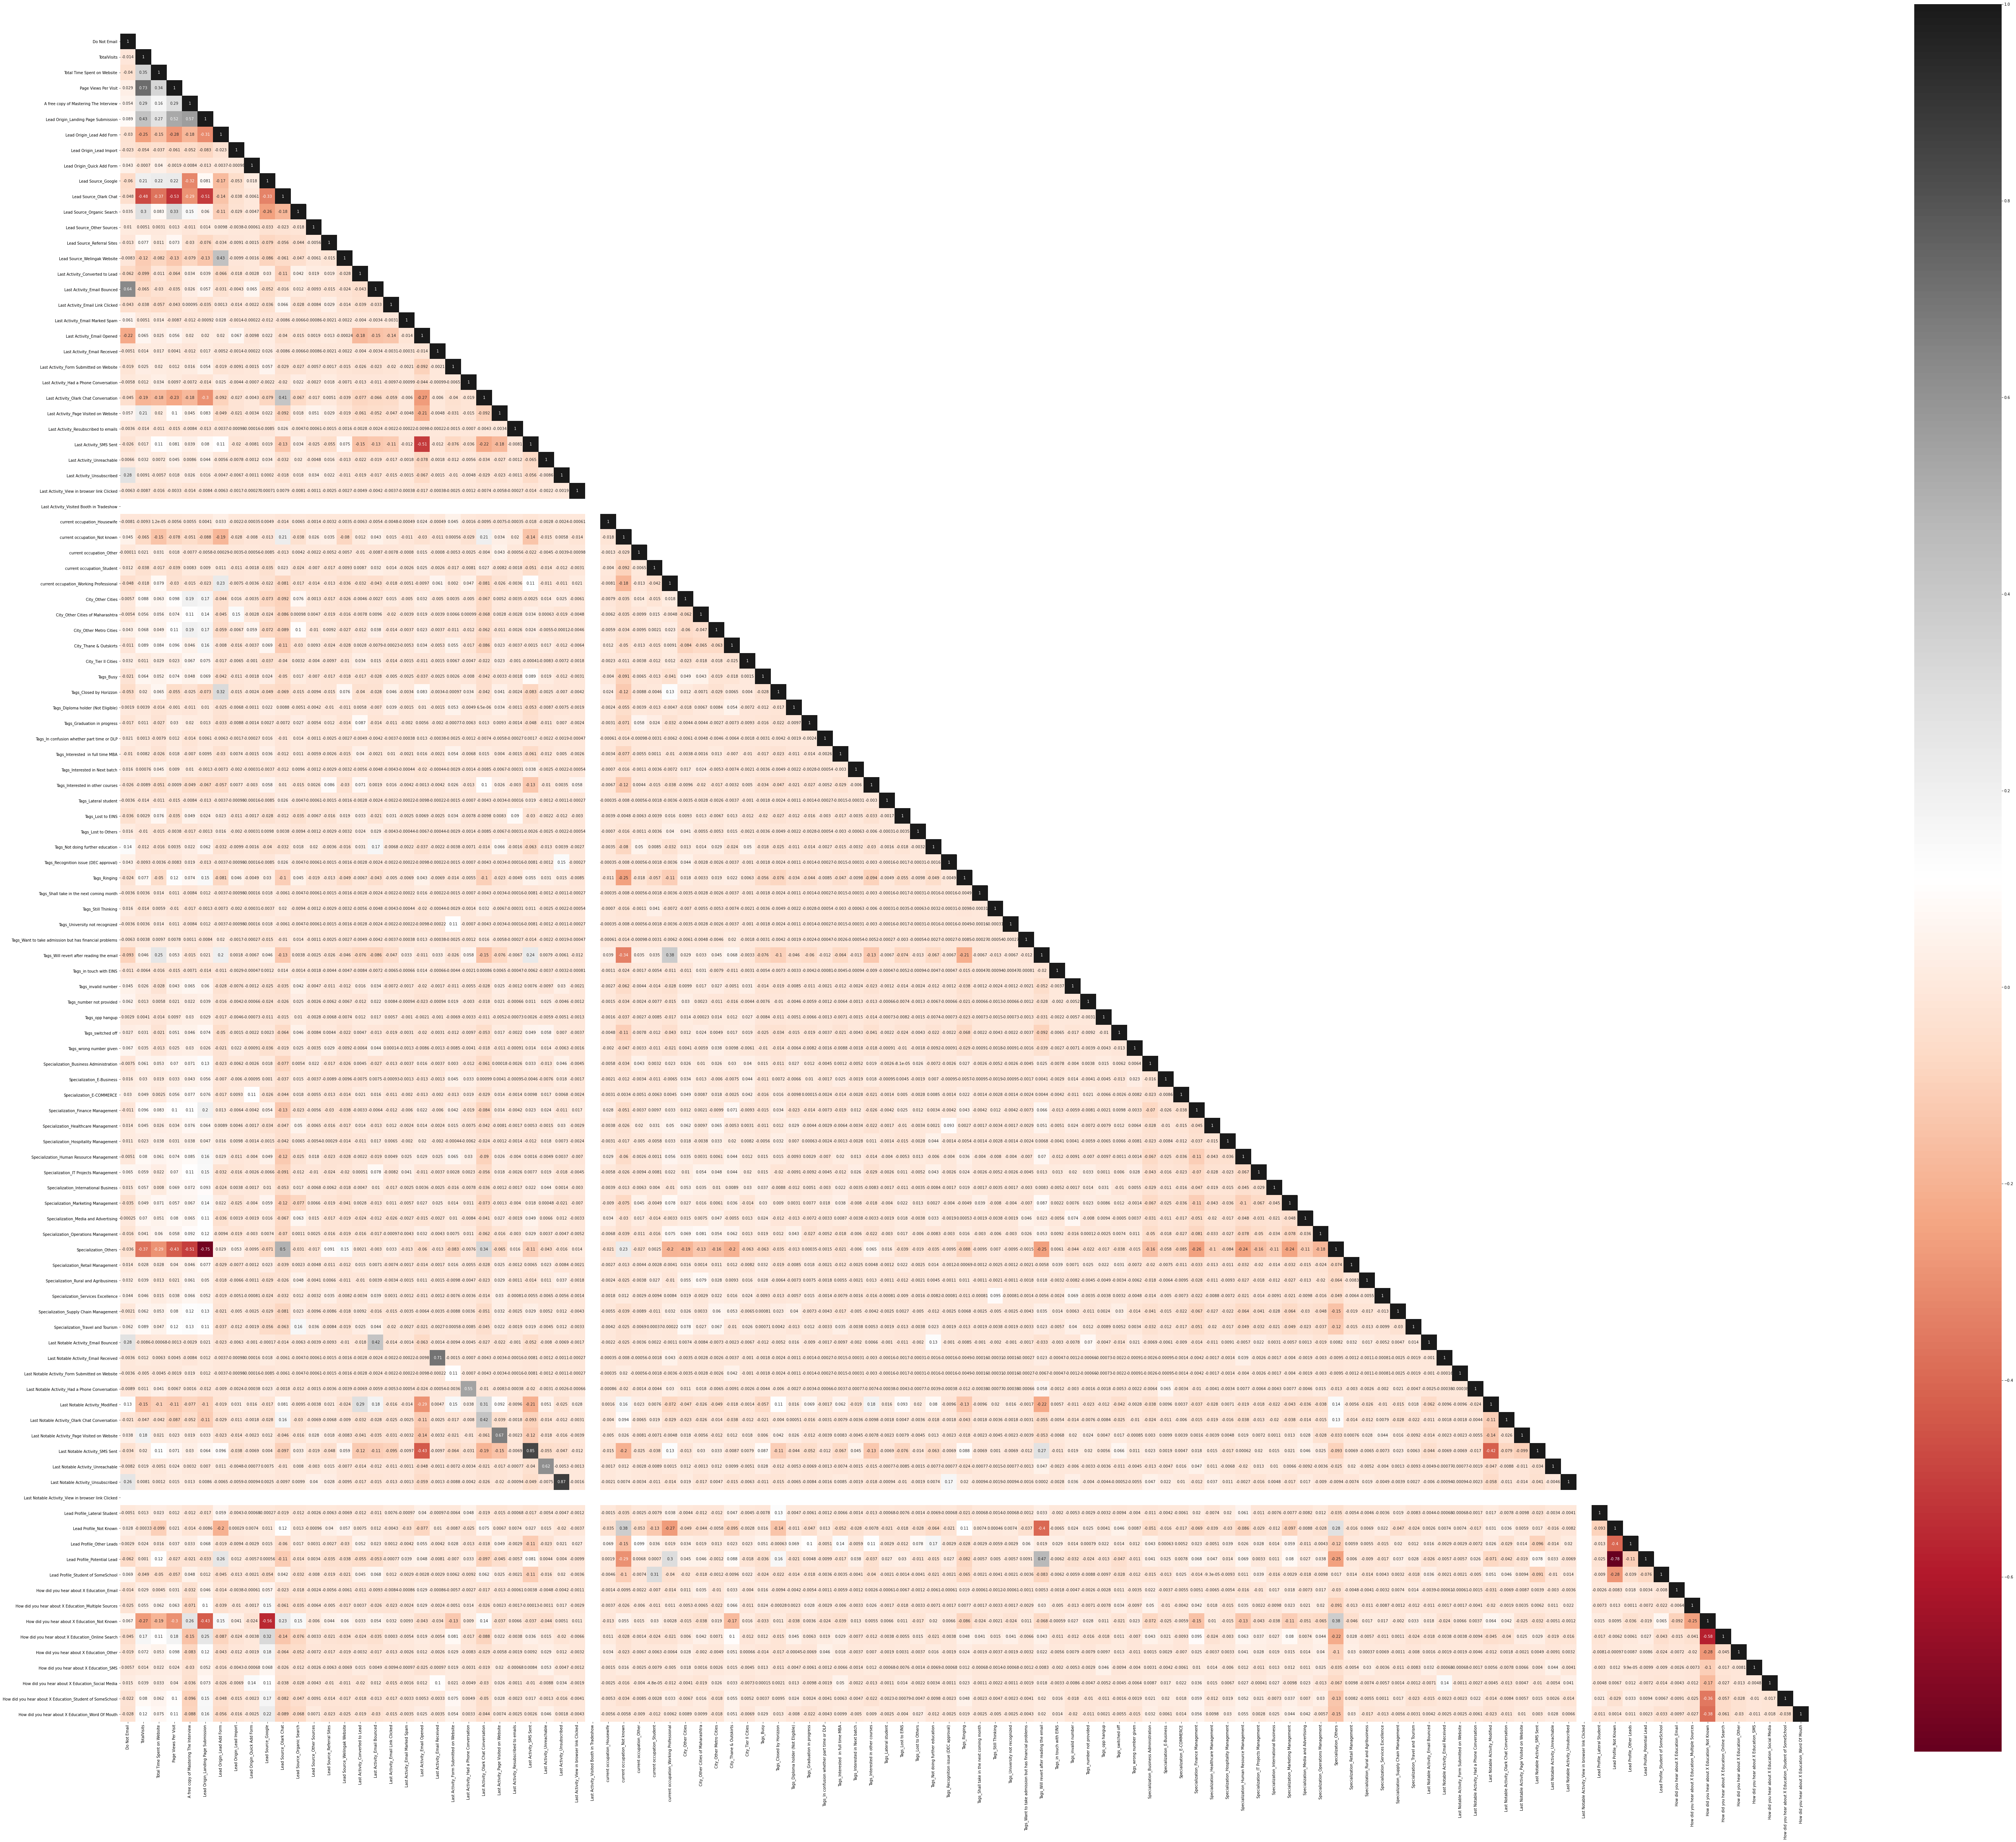

In [83]:
# Checking the correlation Matrix Again

# Heatmap
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(100,85)
sns.heatmap(cor_mat, mask=mask, square=True, annot=True, cbar=True,cmap="RdGy")
plt.show()

#### From the above graph we can see that most of the variables have been taken care of but there is still some correlation left between the variables.

We can take a conservative approach here because there might be some variables which might be useful for the Model going ahead.

### Step-7 Model Building

In [84]:
import statsmodels.api as sm

In [85]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                          107
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 11 Feb 2021   Deviance:                          nan
Time:                        21:44:13   Pearson chi2:                 3.40e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     3.452e+15   3.12e+07    1.1e+08      0.000    3.45e+15    3.45e+15
Do Not Email                                             -7.098e+13    4.6e+06  -1.54e+07      0.000    -7.1e+13    -7.1e+13
TotalVisits                                               8.988e+13   1.36e+06    6.6e+07      0.000    8.99e+13    8.99e+13
Total Time Spent on Website                               3.319e+14   1.02e+06   3.25e+08      0.000    3.32e+14    3.32e+14
Page Views Per Visit                                     -5.015e+13   1.44e+06  -3.49e+07      0.000   -5.02e+13   -5.02e+13
A free copy of Mastering The Interview                   -1.049e+14   3.34e+06  -3.14e+07      0.000   -1.05e+14   -1.05e+14
Lead Origin_Landing Page Submission                      -2.139e+14   3.98e+06  -5.38e+07      0.000   -2.14e+14   -2.14e+14
Lead Origin_Lead Add Form                                 3.915e+13   5.28e+06   7.41e+06      0.000    3.92e+13    3.92e+13
Lead Origin_Lead Import                                   1.371e+14   1.15e+07   1.19e+07      0.000    1.37e+14    1.37e+14
Lead Origin_Quick Add Form                                 5.23e+15   6.88e+07   7.61e+07      0.000    5.23e+15    5.23e+15
Lead Source_Google                                        1.278e+14   3.09e+06   4.14e+07      0.000    1.28e+14    1.28e+14
Lead Source_Olark Chat                                    3.923e+14   4.12e+06   9.52e+07      0.000    3.92e+14    3.92e+14
Lead Source_Organic Search                                1.623e+14   3.27e+06   4.96e+07      0.000    1.62e+14    1.62e+14
Lead Source_Other Sources                                 2.683e+13   1.76e+07   1.53e+06      0.000    2.68e+13    2.68e+13
Lead Source_Referral Sites                               -9.312e+13    7.9e+06  -1.18e+07      0.000   -9.31e+13   -9.31e+13
Lead Source_Welingak Website                              2.004e+15   8.06e+06   2.49e+08      0.000       2e+15       2e+15
Last Activity_Converted to Lead                          -8.903e+14   2.32e+07  -3.84e+07      0.000    -8.9e+14    -8.9e+14
Last Activity_Email Bounced                              -9.496e+14   2.37e+07  -4.01e+07      0.000    -9.5e+14    -9.5e+14
Last Activity_Email Link Clicked                         -9.665e+14   2.33e+07  -4.15e+07      0.000   -9.66e+14   -9.66e+14
Last Activity_Email Marked Spam                           2.986e+15    5.3e+07   5.63e+07      0.000    2.99e+15    2.99e+15
Last Activity_Email Opened                                -7.26e+14   2.28e+07  -3.18e+07      0.000   -7.26e+14   -7.26e+14
Last Activity_Email Received                              2.749e+15   7.19e+07   3.

### Feature Selection Using RFE

In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [87]:
# Running RFE with 20 variables as output
# From the above 
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [88]:
# This command tells us that whether the features selected are in the top 20 or not and False would mean it was not there
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False])

In [89]:
# Initial Shortlisting done by the RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 9),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 52),
 ('A free copy of Mastering The Interview', False, 72),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Origin_Quick Add Form', False, 47),
 ('Lead Source_Google', False, 66),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 67),
 ('Lead Source_Other Sources', False, 30),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 55),
 ('Last Activity_Email Bounced', False, 41),
 ('Last Activity_Email Link Clicked', False, 54),
 ('Last Activity_Email Marked Spam', False, 68),
 ('Last Activity_Email Opened', False, 29),
 ('Last Activity_Email Received', False, 78),
 ('Last Activity_Form Submitted on Website', False, 75),
 ('Last Activity_Had a Phone Conver

In [90]:
col = X_train.columns[rfe.support_]

In [91]:
# Columns which were excluded
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other Sources', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Act

#### Assessing the Model with statistics

#### Model 1

In [92]:
import statsmodels.api as sm

In [93]:
X_train_1 = sm.add_constant(X_train[col])
logis1 = sm.GLM(y_train,X_train_1, family = sm.families.Binomial())
reg1 = logis1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6374
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1297.0
Date:                Thu, 11 Feb 2021   Deviance:                       2594.1
Time:                        21:44:26   Pearson chi2:                 1.38e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4225      0.096     -4.422      0.000      -0.610      -0.235
Lead Origin_Lead Add Form                   -0.1678      0.327     -0.513      0.608      -0.809       0.473
Lead Source_Welingak Website                 3.8702      0.814      4.755      0.000       2.275       5.465
Last Activity_SMS Sent                       2.2376      0.117     19.067      0.000       2.008       2.468
current occupation_Not known                -1.7562      0.121    -14.527      0.000      -1.993      -1.519
Tags_Closed by Horizzon                      6.5084      0.745      8.736      0.000       5.048       7.969
Tags_Diploma holder (Not Eligible)          -3.1520      1.037     -3.041      0.002      -5.184      -1.120
Tags_Graduation in progress                 -1.4789      0.441     -3.351      0.001      -2.344      -0.614
Tags_Interested  in full time MBA           -2.4100      0.600     -4.013      0.000      -3.587      -1.233
Tags_Interested in other courses            -2.9889      0.431     -6.939      0.000      -3.833      -2.145
Tags_Lost to EINS                            6.2957      0.629     10.003      0.000       5.062       7.529
Tags_Not doing further education            -3.7566      1.025     -3.663      0.000      -5.766      -1.747
Tags_Ringing                                -4.3190      0.236    -18.321      0.000      -4.781      -3.857
Tags_Will revert after reading the email     3.9139      0.196     19.992      0.000       3.530       4.298
Tags_invalid number                         -4.8543      1.027     -4.726      0.000      -6.868      -2.841
Tags_number not provided                   -25.3647    2.8e+04     -0.001      0.999   -5.49e+04    5.49e+04
Tags_opp hangup                             -3.6905      1.065     -3.464      0.001      -5.778      -1.603
Tags_switched off                           -5.0872      0.599     -8.497      0.000      -6.261      -3.914
Tags_wrong number given                    -25.1190   2.01e+04     -0.001      0.999   -3.95e+04    3.94e+04
Last Notable Activity_Modified              -1.7156      0.126    -13.656      0.000      -1.962      -1.469
Lead Profile_Student of SomeSchool          -3.3396      0.585     -5.708      0.000      -4.486      -2.193
============================================================================================================
"""

In [94]:
 X_train_2=X_train_1.drop(['const','Tags_number not provided'],1)

In [95]:
X_train_2 = sm.add_constant(X_train_2)
logis2 = sm.GLM(y_train,X_train_2, family = sm.families.Binomial())
reg2 = logis2.fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6375
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1314.7
Date:                Thu, 11 Feb 2021   Deviance:                       2629.5
Time:                        21:44:26   Pearson chi2:                 1.31e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4852      0.095     -5.124      0.000      -0.671      -0.300
Lead Origin_Lead Add Form                   -0.1529      0.327     -0.467      0.640      -0.794       0.489
Lead Source_Welingak Website                 3.9112      0.813      4.811      0.000       2.318       5.505
Last Activity_SMS Sent                       2.1908      0.116     18.961      0.000       1.964       2.417
current occupation_Not known                -1.6800      0.119    -14.067      0.000      -1.914      -1.446
Tags_Closed by Horizzon                      6.5349      0.745      8.777      0.000       5.076       7.994
Tags_Diploma holder (Not Eligible)          -3.0848      1.035     -2.980      0.003      -5.113      -1.056
Tags_Graduation in progress                 -1.4144      0.440     -3.217      0.001      -2.276      -0.553
Tags_Interested  in full time MBA           -2.3500      0.600     -3.915      0.000      -3.526      -1.174
Tags_Interested in other courses            -2.9255      0.430     -6.804      0.000      -3.768      -2.083
Tags_Lost to EINS                            6.2826      0.629      9.995      0.000       5.051       7.515
Tags_Not doing further education            -3.6870      1.024     -3.600      0.000      -5.694      -1.680
Tags_Ringing                                -4.2182      0.234    -18.023      0.000      -4.677      -3.759
Tags_Will revert after reading the email     3.9609      0.195     20.320      0.000       3.579       4.343
Tags_invalid number                         -4.7518      1.027     -4.629      0.000      -6.764      -2.740
Tags_opp hangup                             -3.5916      1.064     -3.376      0.001      -5.677      -1.506
Tags_switched off                           -4.9833      0.598     -8.334      0.000      -6.155      -3.811
Tags_wrong number given                    -24.0222   1.22e+04     -0.002      0.998    -2.4e+04     2.4e+04
Last Notable Activity_Modified              -1.6851      0.125    -13.490      0.000      -1.930      -1.440
Lead Profile_Student of SomeSchool          -3.2911      0.586     -5.614      0.000      -4.440      -2.142
============================================================================================================
"""

In [96]:
 X_train_3=X_train_2.drop(['const','Tags_wrong number given'],1)

In [97]:
X_train_3 = sm.add_constant(X_train_3)
logis3 = sm.GLM(y_train,X_train_3, family = sm.families.Binomial())
reg3 = logis3.fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6376
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.3
Date:                Thu, 11 Feb 2021   Deviance:                       2682.5
Time:                        21:44:27   Pearson chi2:                 1.24e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5768      0.094     -6.163      0.000      -0.760      -0.393
Lead Origin_Lead Add Form                   -0.1272      0.328     -0.388      0.698      -0.770       0.515
Lead Source_Welingak Website                 3.9801      0.812      4.900      0.000       2.388       5.572
Last Activity_SMS Sent                       2.1234      0.113     18.795      0.000       1.902       2.345
current occupation_Not known                -1.5628      0.117    -13.328      0.000      -1.793      -1.333
Tags_Closed by Horizzon                      6.5942      0.744      8.865      0.000       5.136       8.052
Tags_Diploma holder (Not Eligible)          -2.9840      1.033     -2.888      0.004      -5.009      -0.959
Tags_Graduation in progress                 -1.3105      0.437     -2.995      0.003      -2.168      -0.453
Tags_Interested  in full time MBA           -2.2534      0.600     -3.757      0.000      -3.429      -1.078
Tags_Interested in other courses            -2.8238      0.429     -6.582      0.000      -3.665      -1.983
Tags_Lost to EINS                            6.2853      0.628     10.014      0.000       5.055       7.516
Tags_Not doing further education            -3.5782      1.023     -3.498      0.000      -5.583      -1.573
Tags_Ringing                                -4.0716      0.232    -17.576      0.000      -4.526      -3.618
Tags_Will revert after reading the email     4.0439      0.194     20.859      0.000       3.664       4.424
Tags_invalid number                         -4.6025      1.026     -4.487      0.000      -6.613      -2.592
Tags_opp hangup                             -3.4474      1.062     -3.246      0.001      -5.529      -1.366
Tags_switched off                           -4.8319      0.597     -8.096      0.000      -6.002      -3.662
Last Notable Activity_Modified              -1.6676      0.124    -13.454      0.000      -1.911      -1.425
Lead Profile_Student of SomeSchool          -3.2184      0.589     -5.463      0.000      -4.373      -2.064
============================================================================================================
"""

In [98]:
 X_train_4=X_train_3.drop(['const','Lead Origin_Lead Add Form'],1)

In [99]:
X_train_4 = sm.add_constant(X_train_4)
logis4 = sm.GLM(y_train,X_train_4, family = sm.families.Binomial())
reg4 = logis4.fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.3
Date:                Thu, 11 Feb 2021   Deviance:                       2682.7
Time:                        21:44:27   Pearson chi2:                 1.22e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5781      0.094     -6.179      0.000      -0.761      -0.395
Lead Source_Welingak Website                 3.8551      0.746      5.170      0.000       2.394       5.317
Last Activity_SMS Sent                       2.1227      0.113     18.789      0.000       1.901       2.344
current occupation_Not known                -1.5609      0.117    -13.324      0.000      -1.790      -1.331
Tags_Closed by Horizzon                      6.5293      0.724      9.024      0.000       5.111       7.947
Tags_Diploma holder (Not Eligible)          -2.9825      1.033     -2.887      0.004      -5.007      -0.958
Tags_Graduation in progress                 -1.3085      0.437     -2.991      0.003      -2.166      -0.451
Tags_Interested  in full time MBA           -2.2519      0.600     -3.755      0.000      -3.427      -1.076
Tags_Interested in other courses            -2.8235      0.429     -6.582      0.000      -3.664      -1.983
Tags_Lost to EINS                            6.2818      0.628     10.008      0.000       5.052       7.512
Tags_Not doing further education            -3.5781      1.023     -3.498      0.000      -5.583      -1.573
Tags_Ringing                                -4.0742      0.232    -17.592      0.000      -4.528      -3.620
Tags_Will revert after reading the email     4.0235      0.186     21.651      0.000       3.659       4.388
Tags_invalid number                         -4.6006      1.026     -4.485      0.000      -6.611      -2.590
Tags_opp hangup                             -3.4455      1.062     -3.244      0.001      -5.527      -1.364
Tags_switched off                           -4.8300      0.597     -8.093      0.000      -6.000      -3.660
Last Notable Activity_Modified              -1.6692      0.124    -13.472      0.000      -1.912      -1.426
Lead Profile_Student of SomeSchool          -3.2134      0.588     -5.461      0.000      -4.367      -2.060
============================================================================================================
"""

#### Model 4 has all the P-values under 0.05

### VIF

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
X_train_4_1=X_train_4.drop('const',1)  

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Creating new VIF DataFrame 
vif = pd.DataFrame()
vif['Features'] = X_train_4_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_4_1.values, i) for i in range(X_train_4_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                    Tags_Closed by Horizzon  1.08
8                          Tags_Lost to EINS  1.04
14                         Tags_switched off  1.04
6          Tags_Interested  in full time MBA  1.03
9           Tags_Not doing further education  1.03
0               Lead Source_Welingak Website  1.03
5                Tags_Graduation in progress  1.03
16        Lead Profile_Student of SomeSchool  1.03
4         Tags_Diploma holder (Not Eligible)  1.01
12                       Tags_invalid number  1.01
13                           Tags_opp hangup  1.00
7           Tags_Interested in other courses  0.30
11  Tags_Will revert after reading the email  0.12
10                              Tags_Ringing  0.11
1                     Last Activity_SMS Sent  0.09
15            Last Notable Activity_Modified  0.05
2               current occupation_Not known  0.04

#### We have all the VIF values less than 5

In [103]:
# Getting the predicted values on the train set
# Probability of getting a 1
y_train_pred = reg4.predict(X_train_4)
y_train_pred[:10]

7896    0.001794
8701    0.922275
6665    0.969095
8087    0.969095
2466    0.001794
550     0.001794
461     0.105372
6746    0.021708
6888    0.009450
6975    0.022065
dtype: float64

In [104]:
# Reshaping 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00179401, 0.92227544, 0.96909452, 0.96909452, 0.00179401,
       0.00179401, 0.10537179, 0.02170757, 0.00944974, 0.02206479])

#### Creating a DataFrame where we have the converted flag and the predicted probablities

In [105]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number
0          0        0.001794         7896
1          1        0.922275         8701
2          1        0.969095         6665
3          1        0.969095         8087
4          0        0.001794         2466

#### Creating New column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted
0          0        0.001794         7896          0
1          1        0.922275         8701          1
2          1        0.969095         6665          1
3          1        0.969095         8087          1
4          0        0.001794         2466          0

Here, I have selected 0.5 as an arbitrary cutoff wherein if the probability of a particular customer not getting converted is less than 0.5, you'd classify it as 'Not Converted' and if it's greater than 0.5, you'd classify it as 'Converted'. The choice of 0.5 is completely arbitrary at this stage.

### Creating a Confusion Matrix

In [107]:
from sklearn import metrics

In [108]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3880  104]
 [ 429 1982]]


In [109]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9166536356528537


We have an accuracy of __92%__ 

This means the number of customers which got converted plus which didn't get converted over total No. of labels. 

That means:

__(3880+1982)/(3880+104+429+1982)=92%__

#### Metrics beyond simply accuracy

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

1. True Negative (TP): This means customers which have not been converted being predicted as not converted 0.
2. False Positive (FP): This means customers which were not converted were predicted as being converted.
3. False Negative (FN): This means customers which are converted being predicted as not converted.
4. True Positives (TP): This customers which are converted being prediected as converted.


In [111]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity*100

82.20655329738698

Sensitivity: __No.of Actual Yeses correctly predeicted/Total No. of actual Yeses__

Yes- Converted

In [112]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity*100

97.38955823293173

Specificity: __No.of Actual No's correctly predeicted/Total No. of actual No's__

No- Not Converted

In [113]:
# Calculate false postive rate - predicting converted when customer has not converted
print(FP*100/ float(TN+FP))

2.610441767068273


In [114]:
# positive predictive value 
# No. of times we predicted the customer as converted and the number of times we got it right.
print (TP *100 / float(TP+FP))

95.0143815915628


In [115]:
# Negative predictive value
# No. of times we predicted the customer as not converted and the number of times we got it right.
print (TN * 100/ float(TN+ FN))

90.04409375725226


###  Plotting the ROC Curve

ROC Curve:

1. It shows the trade off between sensitivity and specificity(any increase in sensitivity will be accomplished by decrease in specificity).
2. The closer the curve is to the left-hand border the more accurate is our test.
3. The closer the curve comes to the 45 degree diagonal of the ROC curve , less acurate is our test.

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

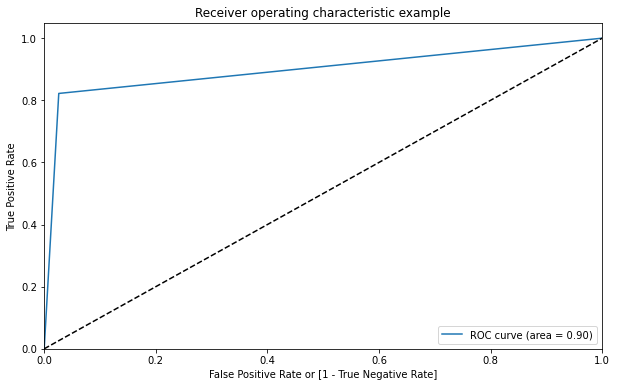

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

1. On the Y-axis, we have the values of __Sensitivity__ and on the X-axis, you have the value of __(1 - Specificity)__. Notice that in the curve when Sensitivity is increasing, (1 - Specificity), And since, (1 - Specificity) is increasing, it simply means that Specificity is decreasing. 


2. By determining the area under the curve (AUC) of an ROC curve, we can determine how good the model is. If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more towards the 45-degree diagonal, it means that the model is almost completely random. So, the larger the AUC, the better will be your model which is something you saw in the last segment as well.


3. __Here the ROC curve shows us that around 90% of area is under the curve__.

### Finding Optimal Cutoff Point

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.001794         7896          0    1    0    0    0    0   
1          1        0.922275         8701          1    1    1    1    1    1   
2          1        0.969095         6665          1    1    1    1    1    1   
3          1        0.969095         8087          1    1    1    1    1    1   
4          0        0.001794         2466          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    1  
2    1    1    1    1    1  
3    1    1    1    1    1  
4    0    0    0    0    0

In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377013  1.000000  0.000000
0.1   0.1  0.789210  0.968893  0.680472
0.2   0.2  0.911962  0.934467  0.898343
0.3   0.3  0.911337  0.932808  0.898343
0.4   0.4  0.921658  0.875156  0.949799
0.5   0.5  0.916654  0.822066  0.973896
0.6   0.6  0.916028  0.820406  0.973896
0.7   0.7  0.915715  0.819577  0.973896
0.8   0.8  0.915715  0.819577  0.973896
0.9   0.9  0.875371  0.681460  0.992721


1. As we can see, when the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high. 


2. At about 0.3, the three metrics seem to be almost equal with decent values and hence, we choose 0.3 as the optimal cut-off point. The following graph also showcases that at about 0.3, the three metrics intersect.


3. From the above data we can see that from all the probability points we have our cut off point at and its probability is 0.3 because all the accuracy, sensitivity and specificity are having the same values.

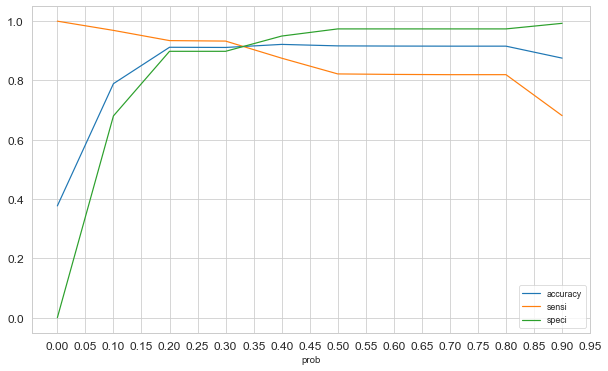

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10,6))

plt.xticks(np.arange(0,1,step=0.05),size=12)
plt.yticks(size=12)
plt.show()

#### From the above graph we find that the cut off probability is 0.33

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.001794         7896          0    1    0    0    0    0   
1          1        0.922275         8701          1    1    1    1    1    1   
2          1        0.969095         6665          1    1    1    1    1    1   
3          1        0.969095         8087          1    1    1    1    1    1   
4          0        0.001794         2466          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    1                1  
2    1    1    1    1    1                1  
3    1    1    1    1    1                1  
4    0    0    0    0    0                0

In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9113369820172009

In [124]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3579,  405],
       [ 162, 2249]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP *100/ float(TP+FN)

93.28079635006222

In [127]:
# Let us calculate specificity
TN *100/ float(TN+FP)

89.83433734939759

In [128]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP*100/ float(TN+FP))

10.16566265060241


In [129]:
# Positive predictive value 
print (TP *100 / float(TP+FP))

84.74001507159005


In [130]:
# Negative predictive value
print (TN *100/ float(TN+ FN))

95.66960705693664


### Precision and Recall

In [131]:
# Precision
Precision = TP *100 /(TP + FP)
Precision

84.74001507159005

__Precision__: Probability that a predicted 'Yes' is actually a 'Yes'.

In [132]:
# Recall
Recall = TP *100 / (TP + FN)
Recall

93.28079635006222

__Recall__:  Probability that an actual 'Yes' case is predicted correctly.

In [133]:
from sklearn.metrics import precision_score, recall_score

In [134]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.950143815915628

In [135]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8220655329738698

### Precision and recall tradeoff

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6390    0
 6391    0
 6392    1
 6393    1
 6394    1
 Name: Converted, Length: 6395, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6390    0
 6391    0
 6392    0
 6393    1
 6394    1
 Name: predicted, Length: 6395, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

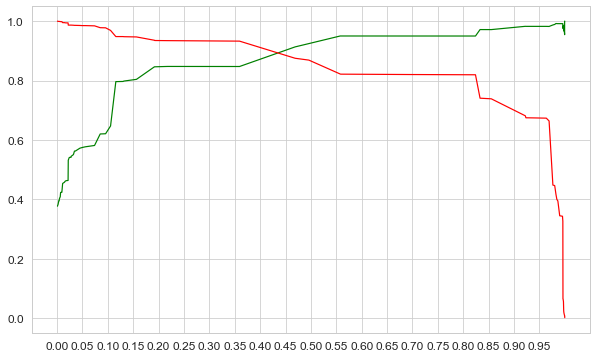

In [139]:
# Plotting the precision recall curve
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.set_context("paper")

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

plt.xticks(np.arange(0,1,step=0.05),size=12)
plt.yticks(size=12)
plt.show()

As we can see, the curve is similar to what you got for sensitivity and specificity. Except now, the curve for precision is quite jumpy towards the end. This is because the denominator of precision, i.e. (TP+FP)is not constant as these are the predicted values of 1s. And because the predicted values can swing wildly, you get a very jumpy curve.

#### The Precission & Recall Trade Off seems to be 0.43. We will use this as threshold for Test data.

### Making predictions on the Test set


In [140]:
# Scaling the features here.
# We use transform here.
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [141]:
X_test = X_test[col]
X_test.head()

Lead Origin_Lead Add Form  Lead Source_Welingak Website  \
5499                          0                             0   
1867                          1                             0   
8284                          0                             0   
3522                          0                             0   
7786                          0                             0   

      Last Activity_SMS Sent  current occupation_Not known  \
5499                       0                             0   
1867                       0                             0   
8284                       0                             0   
3522                       1                             0   
7786                       0                             1   

      Tags_Closed by Horizzon  Tags_Diploma holder (Not Eligible)  \
5499                        0                                   0   
1867                        0                                   0   
8284                        0                                   0   
3522                        0                                   0   
7786                        0                                   0   

      Tags_Graduation in progress  Tags_Interested  in full time MBA  \
5499                            0                                  0   
1867                            0                                  0   
8284                            0                                  0   
3522                            0                                  0   
7786                            0                                  0   

      Tags_Interested in other courses  Tags_Lost to EINS  \
5499                                 0                  0   
1867                                 0                  0   
8284                                 0                  0   
3522                                 0                  0   
7786                                 0                  0   

      Tags_Not doing further education  Tags_Ringing  \
5499                                 0             0   
1867                                 0             0   
8284                                 0             0   
3522                                 0             0   
7786                                 0             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
5499                                         1                    0   
1867                                         0                    0   
8284                                         1                    0   
3522                                         1                    0   
7786                                         0                    0   

      Tags_number not provided  Tags_opp hangup  Tags_switched off  \
5499                         0                0                  0   
1867                         0                0                  0   
8284                         0                0                  0   
3522                         0                0                  0   
7786                         0                0                  0   

      Tags_wrong number given  Last Notable Activity_Modified  \
5499                        0                               0   
1867                        0                               0   
8284                        0                               0   
3522                        0                               0   
7786                        0                               0   

      Lead Profile_Student of SomeSchool  
5499                                   0  
1867                                   0  
8284                                   0  
3522                                   0  
7786                                   0

In [142]:
# Adding a constant
test_cols=X_train_4.columns[1:]
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=reg4.predict(X_test_final)  

#### Making Predictions on the Test set

In [143]:
y_pred_test[:10]

5499    0.969095
1867    0.359379
8284    0.969095
3522    0.996197
7786    0.105372
8073    0.996197
923     0.359379
2220    0.022065
1857    0.969095
4021    0.922275
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_pred_test)

In [145]:
# Let's see the head
y_pred_1.head()

0
5499  0.969095
1867  0.359379
8284  0.969095
3522  0.996197
7786  0.105372

In [146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [147]:
# Putting LeadId to index

y_test_df['Lead Number'] = y_test_df.index

In [148]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [149]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [150]:
y_pred_final.head()

Converted  Lead Number         0
0          1         5499  0.969095
1          1         1867  0.359379
2          1         8284  0.969095
3          1         3522  0.996197
4          0         7786  0.105372

In [151]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [152]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Lead Number  Converted_Prob
0          1         5499        0.969095
1          1         1867        0.359379
2          1         8284        0.969095
3          1         3522        0.996197
4          0         7786        0.105372

In [153]:
# Taking cut-off as 0.33 which we got from the senitivity and the specificity trade off.
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [154]:
y_pred_final.head()

Converted  Lead Number  Converted_Prob  final_predicted
0          1         5499        0.969095                1
1          1         1867        0.359379                1
2          1         8284        0.969095                1
3          1         3522        0.996197                1
4          0         7786        0.105372                0

In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9102517329441809

In [156]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1466,  169],
       [  77, 1029]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP*100 / float(TP+FN)

93.0379746835443

In [159]:
# Let us calculate specificity
TN *100/ float(TN+FP)

89.66360856269114

In [160]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.8589315525876461
recall  0.930379746835443


In [161]:
# ROC-Curve for Test Set

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

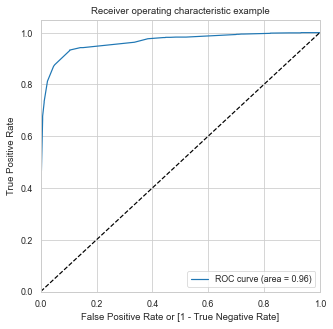

In [163]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

#### Lead Score

In [164]:
# Now let us calculate the lead score
y_pred_final['lead_score'] = (y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.head()

Converted  Lead Number  Converted_Prob  final_predicted  lead_score
0          1         5499        0.969095                1          96
1          1         1867        0.359379                1          35
2          1         8284        0.969095                1          96
3          1         3522        0.996197                1          99
4          0         7786        0.105372                0          10

In [165]:
y_pred_final.sort_values(by='lead_score',ascending=False)

Converted  Lead Number  Converted_Prob  final_predicted  lead_score
621           1         3721        0.996197                1          99
491           1         6138        0.996197                1          99
1759          1         5346        0.996197                1          99
789           1         4717        0.996197                1          99
1548          1         6372        0.996197                1          99
...         ...          ...             ...              ...         ...
600           0         3152        0.009450                0           0
598           0         2771        0.009450                0           0
1982          0         6696        0.009450                0           0
597           0         4871        0.009450                0           0
1370          0         6164        0.004233                0           0

[2741 rows x 5 columns]

In [166]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    1029
0      77
Name: final_predicted, dtype: int64

In [167]:
# check the precentage of final_predicted conversions on test data

1029/float(1029+77)

0.930379746835443

### Conclusion

we have the Sensitivity,Accuracy and Sepecificity of Train and Test Set as below :-

A. For Train Set:

1. Accuracy is: 91%
2. Sensitivity is: 93.2%
3. Specificty is: 89.8%
4. Precision Score: 95%
5. Recall Score: 82.2%
6. False Positive Rate: 10.16%
7. Positive Predictive Value: 84.7%
   
B.  Test Set:

1. Accuracy is: 91%
2. Sensitivity is: 93%
3. Specificity is: 89.66%
4. Precision Score is: 85.8%
5. Recall Score is: 93%


we need to focus on Variables such as :

1. Tags_Closed by Horizon
2. Tags_Lost to EINS
3. Lead Source_Welingak Website
4. Last Activity_SMS Sent
5. Tags_Will revert after reading the email	


If the above process is followed we can get a conversion percentage of around 93%